In [174]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import AllChem

# Make the splits for task 1 (protein extrapolation)

In [175]:
swissprot = pd.read_csv('../processed_data/protein2EC.csv')
swissprot['Promiscuous'] = swissprot['Sequence'].duplicated(keep=False)
swissprot

Entry   Entry Name  \
0       A0A009IHW8  ABTIR_ACIB9   
1       A0A024SC78  CUTI1_HYPJR   
2       A0A024SH76   GUX2_HYPJR   
3       A0A059TC02   CCR1_PETHY   
4       A0A061I403   FICD_CRIGR   
...            ...          ...   
161733      P36352    POLR_PHMV   
161734      P39262    VG56_BPT4   
161735      Q05115   AMDA_BORBO   
161736      Q94MV8   VG56_BPLZ5   
161737      Q9J5H2   V029_FOWPN   

                                                 Sequence  EC number  Length  \
0       MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...    3.2.2.6     269   
1       MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...   3.1.1.74     248   
2       MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...   3.2.1.91     471   
3       MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...   1.2.1.44     333   
4       MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...  2.7.7.108     455   
...                                                   ...        ...     ...   
161733  VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...   2.7.7.48     178   
161734  MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...   3.6.1.12     171   
161735  MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...   4.1.1.76     240   
161736  MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...   3.6.1.12     172   
161737  MANVFDNSSYRDMLKMVFVIRDDLKMTKGEIVSQCCHGAISAYEKS...   3.1.1.29     124   

       clusterRes50 clusterRes30  Promiscuous  
0        A0A009IHW8       A1AY86        False  
1        A0A024SC78   A0A024SC78        False  
2            G4MM92       G4MM92        False  
3            Q9S9N9       P14721        False  
4            Q6AY47       Q6AY47        False  
...             ...          ...          ...  
161733       P36352       P36352        False  
161734       Q94MV8       Q94MV8        False  
161735       Q05115       Q05115        False  
161736       Q94MV8       Q94MV8        False  
161737       Q9J5H2       Q54ZD0        False  

[161738 rows x 8 columns]

In [179]:
reaction2EC = pd.read_csv('../processed_data/reaction2EC.csv')
reaction2EC

Reaction EC number  \
0      CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...   1.1.1.1   
1      CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...   1.1.1.1   
2      CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...   1.1.1.1   
3      NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...   1.1.1.1   
4      NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...   1.1.1.1   
...                                                  ...       ...   
72485  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...   7.6.2.j   
72486  C[C@@]1(O)OC[C@H](O)C1(O)O.Nc1ncnc2c1ncn2[C@@H...   7.6.2.l   
72487  *CS(=O)(=O)[O-].Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO...   7.6.2.o   
72488  Cc1ncc(C[n+]2csc(CCO)c2C)c(N)n1.Nc1ncnc2c1ncn2...   7.6.2.p   
72489  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...   7.6.2.q   

                                           Reaction Text  
0         acetaldehyde + NADH + H+ = ethanol + NAD+  {r}  
1      N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...  
2      N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...  
3      p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...  
4      p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...  
...                                                  ...  
72485                                                NaN  
72486                                                NaN  
72487                                                NaN  
72488                                                NaN  
72489                                                NaN  

[72490 rows x 3 columns]

In [184]:
swissprot[swissprot['EC number'].isin(reaction2EC['EC number'].unique())]

Entry   Entry Name  \
0       A0A009IHW8  ABTIR_ACIB9   
1       A0A024SC78  CUTI1_HYPJR   
2       A0A024SH76   GUX2_HYPJR   
3       A0A059TC02   CCR1_PETHY   
8       A0A068J840   UGT1_PANGI   
...            ...          ...   
161733      P36352    POLR_PHMV   
161734      P39262    VG56_BPT4   
161735      Q05115   AMDA_BORBO   
161736      Q94MV8   VG56_BPLZ5   
161737      Q9J5H2   V029_FOWPN   

                                                 Sequence  EC number  Length  \
0       MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...    3.2.2.6     269   
1       MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...   3.1.1.74     248   
2       MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...   3.2.1.91     471   
3       MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...   1.2.1.44     333   
8       MKSELIFLPAPAIGHLVGMVEMAKLFISRHENLSVTVLIAKFYMDT...  2.4.1.363     475   
...                                                   ...        ...     ...   
161733  VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...   2.7.7.48     178   
161734  MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...   3.6.1.12     171   
161735  MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...   4.1.1.76     240   
161736  MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...   3.6.1.12     172   
161737  MANVFDNSSYRDMLKMVFVIRDDLKMTKGEIVSQCCHGAISAYEKS...   3.1.1.29     124   

       clusterRes50 clusterRes30  Promiscuous  
0        A0A009IHW8       A1AY86        False  
1        A0A024SC78   A0A024SC78        False  
2            G4MM92       G4MM92        False  
3            Q9S9N9       P14721        False  
8            Q2V6K0       Q40287        False  
...             ...          ...          ...  
161733       P36352       P36352        False  
161734       Q94MV8       Q94MV8        False  
161735       Q05115       Q05115        False  
161736       Q94MV8       Q94MV8        False  
161737       Q9J5H2       Q54ZD0        False  

[149788 rows x 8 columns]

In [182]:
reaction2EC[reaction2EC['EC number'].isin(swissprot['EC number'].unique())]

Reaction EC number  \
0      CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...   1.1.1.1   
1      CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...   1.1.1.1   
2      CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...   1.1.1.1   
3      NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...   1.1.1.1   
4      NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...   1.1.1.1   
...                                                  ...       ...   
72476  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...   7.6.2.8   
72477  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...   7.6.2.8   
72478  C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...   7.6.2.9   
72479  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...   7.6.2.9   
72480  *[N+](*)(*)*.Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=...   7.6.2.9   

                                           Reaction Text  
0         acetaldehyde + NADH + H+ = ethanol + NAD+  {r}  
1      N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...  
2      N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...  
3      p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...  
4      p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...  
...                                                  ...  
72476                                                NaN  
72477                                                NaN  
72478                                                NaN  
72479                                                NaN  
72480                                                NaN  

[53594 rows x 3 columns]

### Splits with low sequence identity

In [ ]:
not_promiscuous = swissprot[~swissprot['Promiscuous']]

At 30% identity clustering (low seuqence identity)

In [163]:
isolated30 = not_promiscuous[not_promiscuous['clusterRes30'].map(swissprot['clusterRes30'].value_counts()) == 1]
isolated30['EC3'] = isolated30['EC number'].str.split('.').str[:3].str.join('.')
isolated30

/tmp/ipykernel_593873/3918235959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolated30['EC3'] = isolated30['EC number'].str.split('.').str[:3].str.join('.')


Entry   Entry Name  \
14      A0A0A1H8I4    AIS_PSESP   
28      A0A0D1DWQ2   CMU1_USTMA   
39      A0A0F5HNH9   IMEF_BACTR   
41      A0A0H2V8B5   TCPC_ECOL6   
42      A0A0H2WWV6   TARM_STAAC   
...            ...          ...   
161496      Q9YPD5   RDRP_MBVLF   
161715      R1ENF4  ALMA5_EMIHU   
161732      O55721    PARP_IIV6   
161733      P36352    POLR_PHMV   
161735      Q05115   AMDA_BORBO   

                                                 Sequence EC number  Length  \
14      MFPRLPTLALGALLLASTPLLAAQPVTTLTVLSSGGIMGTIREVAP...   5.3.3.7     262   
28      MKLSVSIFVLLAVSAFGGGSAAAVSGKSEAAEIEAGDRLDALRDQL...  5.4.99.5     290   
39      MKEELDAFHQIFTTTKEAIERFMAMLTPVIENAEDDHERLYYHHIY...  1.16.3.1     192   
41      MIAYENIEFFICLVNVLGNNMYNILFFIFLSIAIPFLLFLAWKQHL...   3.2.2.6     307   
42      MKKIFMMVHELDVNKGGMTSSMFNRSKEFYDADIPADIVTFDYKGN...  2.4.1.70     493   
...                                                   ...       ...     ...   
161496  MDSGLYPKTGAPTWFYGWSKQREGGFSDFGSEIFRLRALPPLKAEI...  2.7.7.48     420   
161715  MPAQAVVGTNSYLFRTVHAEVKGLRYLDVRAGKELSVSQKKALKEA...   4.4.1.3     504   
161732  MDNLKEEETNEINYIIDQLQKLNKKFKIYTVQRFKEEEPFNKYISE...  2.4.2.30     181   
161733  VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...  2.7.7.48     178   
161735  MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...  4.1.1.76     240   

       clusterRes50 clusterRes30  Promiscuous     EC3  
14       A0A0A1H8I4   A0A0A1H8I4        False   5.3.3  
28       A0A0D1DWQ2   A0A0D1DWQ2        False  5.4.99  
39       A0A0F5HNH9   A0A0F5HNH9        False  1.16.3  
41       A0A0H2V8B5   A0A0H2V8B5        False   3.2.2  
42       A0A0H2WWV6   A0A0H2WWV6        False   2.4.1  
...             ...          ...          ...     ...  
161496       Q9YPD5       Q9YPD5        False   2.7.7  
161715       R1ENF4       R1ENF4        False   4.4.1  
161732       O55721       O55721        False   2.4.2  
161733       P36352       P36352        False   2.7.7  
161735       Q05115       Q05115        False   4.1.1  

[2303 rows x 9 columns]

In [165]:
np.random.seed(42)
random.seed(42)
#sample a random one from each unique EC at level 3
isolated30 = isolated30.groupby('EC3').sample(1)
isolated30

Entry  Entry Name                                           Sequence  \
118634  Q9RBP5  ISOH_RHOSX  MSTVLVVGADKGIAHSISRQLHDRGEDVIAACLFDGADLAAAGITV...   
18987   P29898  DHM2_PARDE  MKRILTLTVAALALGTPALAYDGTNCKAPGNCWEPKPDYPAKVEGS...   
26504   Q9AJD6   PNO_MICLT  MAQYDVAIIGAGSAGALIAARLSEDPARNVLLIEAGGRPSDPDILK...   
3452    P13650  DHGB_ACICA  MNKHLLAKIALLSAVQLVTLSAFADVPLTPSQFAKAKSENFDKKVI...   
17073   O33820  HCRB_THAAR  MNILTDFRTHRPATLADAVNALAAEATLPLGAGTDLLPNLRRGLGH...   
...        ...         ...                                                ...   
68588   O54029  MMDD_PROMO  MNITELMELFSNPETIKTLETGDLMTGIGVTVVLGMGITVVALIFL...   
144503  Q0P887  TUPC_CAMJE  MIEISNLFFNYQNKEVLKIKNLKLDTSKISILMGANGSGKSTFLRI...   
75670   P96313  SECA_CYTFI  KLAGMTGTAKTEEEEFRNIYGMDVMVIPTNKPIARIDKPDLIYKTM...   
98293   Q5WCL2  TAGH_SHOC1  MNPKMILTGVSKKYTLYRNNTEKLKAMFFPKTREQHRDFYALKDIN...   
67567   O21280  CCMA_RECAM  MNLTKIQNLTIHNITGIRSNKIIFQNINFSLEKGSLFIIQGSNGSG...   

        EC number  Length clusterRes50 clusterRes30  Promiscuous    EC3  
118634  1.1.1.398     226       Q9RBP5       Q9RBP5        False  1.1.1  
18987     1.1.2.7     103       P29898       P29898        False  1.1.2  
26504    1.1.3.12     507       Q9AJD6       Q9AJD6        False  1.1.3  
3452      1.1.5.2     478       P13650       P13650        False  1.1.5  
17073     1.1.7.1     324       O33820       O33820        False  1.1.7  
...           ...     ...          ...          ...          ...    ...  
68588     7.2.4.3     137       O54029       O54029        False  7.2.4  
144503    7.3.2.6     331       Q0P887       Q0P887        False  7.3.2  
75670     7.4.2.8     473       P96313       P96313        False  7.4.2  
98293     7.5.2.4     360       Q5WCL2       Q5WCL2        False  7.5.2  
67567     7.6.2.5     222       O21280       O21280        False  7.6.2  

[188 rows x 9 columns]

At 50% sequence identity clustering (moderate sequence identity)

In [167]:
isolated50 = not_promiscuous[not_promiscuous['clusterRes50'].map(swissprot['clusterRes50'].value_counts()) == 1]
isolated50['EC3'] = isolated50['EC number'].str.split('.').str[:3].str.join('.')
isolated50

/tmp/ipykernel_593873/1036468880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolated50['EC3'] = isolated50['EC number'].str.split('.').str[:3].str.join('.')


Entry   Entry Name  \
0       A0A009IHW8  ABTIR_ACIB9   
9       A0A072UR65  CHT5B_MEDTR   
11      A0A075BSX9   HLNO_SHIS7   
13      A0A096P8D3    IDH_OSTTA   
14      A0A0A1H8I4    AIS_PSESP   
...            ...          ...   
161731      W6VBF4   MDDA_PSESZ   
161732      O55721    PARP_IIV6   
161733      P36352    POLR_PHMV   
161735      Q05115   AMDA_BORBO   
161737      Q9J5H2   V029_FOWPN   

                                                 Sequence  EC number  Length  \
0       MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...    3.2.2.6     269   
9       MANILNLKHLLTLALILLALATKSSTSSSSSITRVKGIYWLENPFF...   3.2.1.14     379   
11      MTEKIYDAIVVGAGFSGLVAARELSAQGRSVLIIEARHRLGGRTHV...    1.5.3.5     437   
13      MTRVERGRVLARAIERAVAHRASARRWTTTTRTPAWMVTGWMGGRG...   1.1.1.41     470   
14      MFPRLPTLALGALLLASTPLLAAQPVTTLTVLSSGGIMGTIREVAP...    5.3.3.7     262   
...                                                   ...        ...     ...   
161731  MNPPNRTGHRFFVFSGKLAGLLYSLCCYLFFLLTALYLIGFLAGIG...  2.1.1.334     260   
161732  MDNLKEEETNEINYIIDQLQKLNKKFKIYTVQRFKEEEPFNKYISE...   2.4.2.30     181   
161733  VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...   2.7.7.48     178   
161735  MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...   4.1.1.76     240   
161737  MANVFDNSSYRDMLKMVFVIRDDLKMTKGEIVSQCCHGAISAYEKS...   3.1.1.29     124   

       clusterRes50 clusterRes30  Promiscuous    EC3  
0        A0A009IHW8       A1AY86        False  3.2.2  
9        A0A072UR65   A0A072UR65        False  3.2.1  
11       A0A075BSX9       H8ZPX1        False  1.5.3  
13       A0A096P8D3       P79089        False  1.1.1  
14       A0A0A1H8I4   A0A0A1H8I4        False  5.3.3  
...             ...          ...          ...    ...  
161731       W6VBF4       Q89V40        False  2.1.1  
161732       O55721       O55721        False  2.4.2  
161733       P36352       P36352        False  2.7.7  
161735       Q05115       Q05115        False  4.1.1  
161737       Q9J5H2       Q54ZD0        False  3.1.1  

[11639 rows x 9 columns]

In [168]:
np.random.seed(42)
random.seed(42)
#sample a random one from each unique EC at level 3
isolated50 = isolated50.groupby('EC3').sample(1)
isolated50

Entry   Entry Name  \
86493   Q2S4R2    LDH_SALRD   
16075   B8MKR3   CYB2_TALSN   
14309   A3RXB7  HEXNO_RALSU   
142313  P56954    MQO_CAMJE   
17072   O33818   HCRC_THAAR   
...        ...          ...   
120008  Q9ZAA8   GCDD_ACIFV   
17022   O31427   SKFE_BACSU   
101547  Q6G2E2   METN_BARHE   
13434   Q9YGA6   MALK_THELN   
85339   Q2K6L3  UGPC1_RHIEC   

                                                 Sequence EC number  Length  \
86493   MIQRRTVGIVGTGNVGTAAAYAMFNQSLASEILLLDQDTRRAEGEA...  1.1.1.27     316   
16075   MARVLDAAEVAKHNTPESCWVILYGKVYDVTEFISSHPGGVKVILR...   1.1.2.3     496   
14309   MTLDVSRQDPRYNTLKHGFNLRWPSTDAQAAGRIALCEKADDVAPA...  1.1.3.29     508   
142313  MSQQEFDVLVIGAGISGAALFYELARYTNIKNIALIEKYNTAATLN...   1.1.5.4     448   
17072   MKNILRLTLNGRAREDLVPDNMLLLDYLRETVGLTGTKQGCDGGEC...   1.1.7.1     161   
...                                                   ...       ...     ...   
120008  MTDNPWLIMMINMTIVFGVLIVLGILMVLIHAVDPTKKVQGKKKPV...   7.2.4.5     107   
17022   MQLMQVQNLSKCYRNGDGVEHLSFSIQRGEIVALLGPNGAGKTTTI...   7.3.2.3     239   
101547  MENPSLISLKKISRCFNTTTDICALDNLSLNIHAGEILGIIGRSGA...  7.4.2.11     344   
13434   MAGVRLVDVWKVFGEVTAVREMSLEVKDGEFMILLGPSGCGKTTTL...   7.5.2.1     372   
85339   MAAIELIDLKKNYGPVPAVKGINLTVADGEMIVLVGPSGCGKSTLL...  7.6.2.10     347   

       clusterRes50 clusterRes30  Promiscuous    EC3  
86493        Q2S4R2       Q9BYZ2        False  1.1.1  
16075        B8MKR3       B8MKR3        False  1.1.2  
14309        A3RXB7       A3RXB7        False  1.1.3  
142313       P56954       O24913        False  1.1.5  
17072        O33818       O32143        False  1.1.7  
...             ...          ...          ...    ...  
120008       Q9ZAA8       Q56724        False  7.2.4  
17022        O31427       Q9JUX4        False  7.3.2  
101547       Q6G2E2       Q8G5P8        False  7.4.2  
13434        Q9YGA6       Q9JUX4        False  7.5.2  
85339        Q2K6L3       Q9JUX4        False  7.6.2  

[230 rows x 9 columns]

### Misclassified split from Price et al.

In [41]:
price = pd.read_csv('raw_data/price.tsv', sep='\t')
#remove sequences in price that are in swissprot
price = price[~price['Sequence'].isin(swissprot['Sequence'])]
price

Entry EC number                                           Sequence
0    WP_063460136   5.3.1.7  MAIPPYPDFRSAAFLRQHLRATMAFYDPVATDASGGQFHFFLDDGT...
1    WP_063462980  4.2.1.43  VPTTFHEDGTLDLDSQKRCLDFMIDAGVDGVCILANFSEQFSLSDA...
2    WP_063462990  1.1.1.48  LIDCNIDMTQLFAPSSSSTDATGAPQGLAKFPSLQGRAVFVTGGGS...
3    WP_041412631  4.2.1.25  MCLGRRRCHMNNKKPKTLRSASWFGSDDKNGFMYRSWMKNQGIPEH...
4    WP_011717048   5.1.3.3  MQLSVTQKSLQHAAFADELQLVTLTNSHGLEVVLSNYGASIWSVKL...
..            ...       ...                                                ...
144  WP_010207013   1.3.8.7  MADYKAPLRDMRFVLNEVFEVATTWAQLPALADTVDAETVEAILEE...
145  WP_010207016   1.3.8.7  MPDYKAPLRDIRFVRDELLGYEAHYQSLPACQDATPDMVDAILEEG...
146  WP_010207340  2.6.1.19  MSSNNPQTREWQALSSDHHLAPFSDFKQLKEKGPRIITKAHGVYLW...
147  WP_010207341  6.3.1.11  MSVPPRAVQLNEANAFLKDHPEVLYVDLLIADMNGVVRGKRIERTS...
148  WP_010213153  1.2.1.26  MSQAQRFDNYINGQWVAGADYCVNLNPSELSDVIGEYAKADVTQVN...

[148 rows x 3 columns]

### Promsicuous Split

In [145]:
promiscuous = swissprot[swissprot['Promiscuous']]
promiscuous

Entry   Entry Name  \
18      A0A0A7GEY4  GGPPS_GEOAI   
19      A0A0A7GEY4  GGPPS_GEOAI   
20      A0A0A7GEY4  GGPPS_GEOAI   
23      A0A0C5Q4Y6  C76H2_ROSOF   
24      A0A0C5Q4Y6  C76H2_ROSOF   
...            ...          ...   
161267      Q9UYY9   PORC_PYRAB   
161292      Q9V0Y5   MTAD_PYRAB   
161293      Q9V0Y5   MTAD_PYRAB   
161598      Q9ZEE1   PDRP_RICPR   
161599      Q9ZEE1   PDRP_RICPR   

                                                 Sequence    EC number  \
18      MISEIIKDRAKLVNEKIEELLKEQEPEGLYRAARHYLKAGGKRLRP...      2.5.1.1   
19      MISEIIKDRAKLVNEKIEELLKEQEPEGLYRAARHYLKAGGKRLRP...     2.5.1.10   
20      MISEIIKDRAKLVNEKIEELLKEQEPEGLYRAARHYLKAGGKRLRP...     2.5.1.29   
23      MDSFPLLAALFFILAATWFISFRRPRNLPPGPFPYPIVGNMLQLGT...  1.14.14.175   
24      MDSFPLLAALFFILAATWFISFRRPRNLPPGPFPYPIVGNMLQLGT...   1.14.14.60   
...                                                   ...          ...   
161267  MIEIRFHGRGGQGAVTAANILAEAAFIEGKYVQAFPFFGVERRGAP...      1.2.7.7   
161292  MVSLSVLLRGGLVLYGRDYKLTRADVLIEGDKIVEVKRNINKPADE...     3.5.4.28   
161293  MVSLSVLLRGGLVLYGRDYKLTRADVLIEGDKIVEVKRNINKPADE...     3.5.4.31   
161598  MTKLIIHLVSDSSVQTAKHAANSALAQFTSIKQKLYHWPMIRNCEL...    2.7.11.32   
161599  MTKLIIHLVSDSSVQTAKHAANSALAQFTSIKQKLYHWPMIRNCEL...     2.7.4.27   

        Length clusterRes50 clusterRes30  Promiscuous  
18         319       Q8PW34       P9WKH1         True  
19         319       Q8PW34       P9WKH1         True  
20         319       Q8PW34       P9WKH1         True  
23         493       S4UX02       Q6XQ14         True  
24         493       S4UX02       Q6XQ14         True  
...        ...          ...          ...          ...  
161267     185       O58411       O05650         True  
161292     425       Q9V0Y5       P72156         True  
161293     425       Q9V0Y5       P72156         True  
161598     273       C4K0B5       Q8GVP6         True  
161599     273       C4K0B5       Q8GVP6         True  

[17007 rows x 8 columns]

In [146]:
promiscuous['EC3'] = promiscuous['EC number'].str.split('.').str[:3].str.join('.')
unique_level3 = promiscuous['EC3'].unique()
len(unique_level3)

/tmp/ipykernel_593873/1190340994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promiscuous['EC3'] = promiscuous['EC number'].str.split('.').str[:3].str.join('.')


135

In [147]:
promiscuous['Sequence'].value_counts().hist()

<Axes: >

In [148]:
promiscuous = promiscuous.groupby('Sequence').agg({'EC number': lambda x: list(x)}).reset_index()
promiscuous

Sequence  \
0     AAAWMLNGCLQVMDSRTIPANRNADNVDPALQTATHLCFPTRPVRV...   
1     AEVCYSHLGCFSDEKPWAGTSQRPIKSLPSDPKKINTRFLLYTNEN...   
2     AGTVGKVIKCKAAVAWEAGKPLCIEEIEVAPPKAHEVRIKIIATAV...   
3     AHNIVLYTGAKMPILGLGTWKSPPGKVTEAVKVAIDLGYRHIDCAH...   
4     AICACCKVLNSNEKASCFSNKTFKGLGNAGGLPWKCNSVDMKHFVS...   
...                                                 ...   
8028  SSWWAHVEMGPPDPILGVTEAYKRDTNSKKMNLGVGAYRDDNGKPY...   
8029  TDATGKPIKCMAAIAWEAKKPLSIEEVEVAPPKSGEVRIKILHSGV...   
8030  VQNPGASAIQCRAAVLRKEGQPMKIEQVLIQAPGPNQVRVKMVSSG...   
8031  VVSAGLIAGDFVTVLQALPRSEHQVVAVAARDLRRAEEFARTHGIP...   
8032  VVYKARDRVTNETIALKKIRLEQEDEGVPSTAIREISLLKEMQHRN...   

                                       EC number  
0                [1.1.1.100, 2.3.1.41, 2.3.1.86]  
1                            [3.1.1.26, 3.1.1.3]  
2                           [1.1.1.1, 1.1.1.284]  
3     [1.1.1.21, 1.1.1.300, 1.1.1.372, 1.1.1.54]  
4                            [1.5.1.3, 2.1.1.45]  
...                                          ...  
8028                          [2.6.1.1, 2.6.1.7]  
8029                        [1.1.1.1, 1.1.1.284]  
8030                      [1.1.1.347, 1.1.1.354]  
8031                       [1.1.1.179, 1.3.1.20]  
8032                      [2.7.11.22, 2.7.11.23]  

[8033 rows x 2 columns]

In [149]:
def get_difference_level(predicted_ECs):
    counters = []

    for true_EC in predicted_ECs:

        #convert true_EC to a list
        if type(predicted_ECs) == str:
            predicted_ECs = [predicted_ECs]
        true_split = true_EC.split('.')

        for predicted in predicted_ECs:
            #print(true_EC)
            
            predicted_split = predicted.split('.')
            counter = 0
            for predicted, true in zip(predicted_split, true_split):
                if predicted == true:
                    counter += 1
                else:
                    break
            counters.append(4 - counter)

    return np.max(counters)

In [150]:
promiscuous['Surprise Level'] = promiscuous['EC number'].apply(get_difference_level)
promiscuous['Number of ECs'] = promiscuous['EC number'].apply(lambda x: len(x))
promiscuous['Duplicated EC'] = promiscuous['EC number'].duplicated(keep=False)
promiscuous = promiscuous.sort_values(['Duplicated EC', 'Surprise Level', 'Number of ECs'], ascending=False)

In [153]:
promiscuous.drop_duplicates(subset='EC number', inplace=True)
promiscuous.reset_index(inplace=True)
promiscuous

level_0  index                                           Sequence  \
0          0    370  MAGWSCLVTGAGGFVGQRIIKMLVQEKELQEVRALDKVFRPETKEE...   
1          1    525  MALLRGVFIVAAKRTPFGAYGGLLKDFSATDLTEFAARAALSAGKV...   
2         10    222  MADRIELRGLTVHGRHGVYDHERVAGQRFVIDVTVWIDLAEAANSD...   
3         12    244  MAEAVLIDLFGLKLNSQKNCHQTLLKTLNAVQYHHAAKAKFLCIMC...   
4         14    457  MAKLTAVPLSALVDEPVHIQVTGLAPFQVVCLQASLKDEKGNLFSS...   
..       ...    ...                                                ...   
788     8028   7873  MVTVEEVRKAQRAEGPATVLAIGTATPPNCVGQSTYPDYYFRITNS...   
789     8029   7887  MVVRPNVKELPGPKAKEVIERNFKYLAMTTQDPENLPIVIERGEGI...   
790     8030   7896  MVYPRLLINLKEIEENARKVVEMASRRGIEIVGVTKVTLGDPRFAE...   
791     8031   8014  MYSLHDFKFPEDWIEPPANDKCIYTCYKEVVDFKLFEENKKTLEYY...   
792     8032   8030  VQNPGASAIQCRAAVLRKEGQPMKIEQVLIQAPGPNQVRVKMVSSG...   

                                      EC number  Surprise Level  \
0    [1.1.1.145, 1.1.1.210, 1.1.1.270, 5.3.3.1]               4   
1         [2.3.1.16, 2.3.1.9, 3.1.2.1, 3.1.2.2]               4   
2              [1.13.11.81, 4.1.2.25, 5.1.99.8]               4   
3                  [2.4.2.1, 2.4.2.28, 3.5.4.4]               4   
4                 [2.3.1.65, 3.1.2.2, 3.1.2.27]               4   
..                                          ...             ...   
788                       [2.3.1.212, 2.3.1.74]               1   
789                        [2.6.1.13, 2.6.1.36]               1   
790                         [5.1.1.12, 5.1.1.5]               1   
791                        [4.2.3.15, 4.2.3.47]               1   
792                      [1.1.1.347, 1.1.1.354]               1   

     Number of ECs  Duplicated EC  
0                4           True  
1                4           True  
2                3           True  
3                3           True  
4                3           True  
..             ...            ...  
788              2          False  
789              2          False  
790              2          False  
791              2          False  
792              2          False  

[793 rows x 7 columns]

In [158]:
promiscuous = promiscuous[promiscuous['Surprise Level'] >= 2]
promiscuous = promiscuous[promiscuous['Duplicated EC']]
promiscuous

level_0  index                                           Sequence  \
0          0    370  MAGWSCLVTGAGGFVGQRIIKMLVQEKELQEVRALDKVFRPETKEE...   
1          1    525  MALLRGVFIVAAKRTPFGAYGGLLKDFSATDLTEFAARAALSAGKV...   
2         10    222  MADRIELRGLTVHGRHGVYDHERVAGQRFVIDVTVWIDLAEAANSD...   
3         12    244  MAEAVLIDLFGLKLNSQKNCHQTLLKTLNAVQYHHAAKAKFLCIMC...   
4         14    457  MAKLTAVPLSALVDEPVHIQVTGLAPFQVVCLQASLKDEKGNLFSS...   
..       ...    ...                                                ...   
148     3870   2289  MGNRAGRSDFEWVYTDQPHTQRRKEMLAKYPAIKALMRPDPYLKWT...   
149     3899   2650  MILPCESFNGVPSGCLIIEMNWYSVLKASTAIFFPEKYSSSTSSLS...   
150     4093   3943  MMILVTGGARSGKSRHAEALIGDAPQVLYIATSQILDDEMAARIQH...   
151     4124   4430  MPAASKNVVMIDNYDSFTWNLYEYLCQEGANVEVFRNDQITIPEIE...   
152     4128   4897  MPIFTFSTNVPSENISVDFLKSTSKLIAGMLGKPESYVAVHINGGQ...   

                                      EC number  Surprise Level  \
0    [1.1.1.145, 1.1.1.210, 1.1.1.270, 5.3.3.1]               4   
1         [2.3.1.16, 2.3.1.9, 3.1.2.1, 3.1.2.2]               4   
2              [1.13.11.81, 4.1.2.25, 5.1.99.8]               4   
3                  [2.4.2.1, 2.4.2.28, 3.5.4.4]               4   
4                 [2.3.1.65, 3.1.2.2, 3.1.2.27]               4   
..                                          ...             ...   
148                     [1.14.18.5, 1.14.19.17]               2   
149                        [2.7.7.74, 2.7.8.34]               2   
150                       [2.7.1.156, 2.7.7.62]               2   
151                        [4.1.1.48, 4.1.3.27]               2   
152                         [5.3.2.1, 5.3.3.12]               2   

     Number of ECs  Duplicated EC  
0                4           True  
1                4           True  
2                3           True  
3                3           True  
4                3           True  
..             ...            ...  
148              2           True  
149              2           True  
150              2           True  
151              2           True  
152              2           True  

[153 rows x 7 columns]

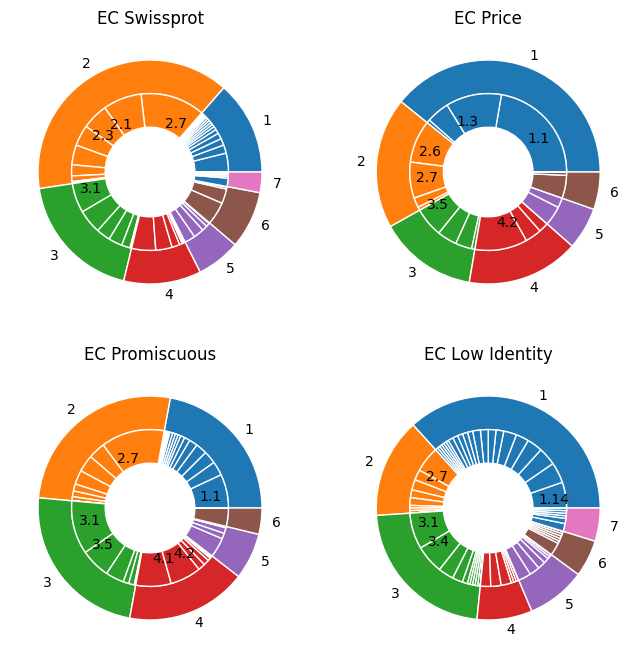

In [169]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for index, title in enumerate(['EC Swissprot', 'EC Price', 'EC Promiscuous', 'EC Low Identity']):

    df = pd.DataFrame()
    if index == 0:
        df['EC'] = swissprot['EC number']
    if index == 1:
        df['EC'] = price['EC number']
    elif index == 2:
        df['EC'] = promiscuous.explode('EC number')['EC number']
    elif index == 3:
        df['EC'] = isolated30['EC number']

    df['EC1'] = df['EC'].str.split('.').str[0]
    df['EC2'] = df['EC'].str.split('.').str[:2].str.join('.')

    distribution = [list(df[df['EC1'] == ec]['EC2'].value_counts().values) for ec in np.sort(df['EC1'].unique())]
    level2_labels = [list(df[df['EC1'] == ec]['EC2'].value_counts().keys()) for ec in np.sort(df['EC1'].unique())]

    #concatenate zeros so that each list is the same length
    max_len = max([len(l) for l in distribution])
    for i, l in enumerate(distribution):
        distribution[i] = l + [0] * (max_len - len(l))
        level2_labels[i] = level2_labels[i] + [''] * (max_len - len(level2_labels[i]))
    #distribution

    sum = np.sum(np.sum(distribution))
    #replace level2 labels with an empty string if the corresponding entry in distribution is too small
    for i, l in enumerate(distribution):
        for j, count in enumerate(l):
            if count/sum < 0.05:
                level2_labels[i][j] = ''


    size = 0.3
    #vals = np.array([[1000., 32.], [37., 40.], [29., 10.]])
    vals = np.array(distribution)
    i = index // 2
    j = index % 2

    cmap = plt.colormaps["tab10"]
    #outer_colors = cmap(np.arange(vals.shape[0])*3.7)
    #inner_colors = cmap(np.arange(vals.shape[0]*vals.shape[1]))

    mylabels = np.arange(1, vals.shape[0]+1)

    outer_colors = sns.color_palette("tab10", vals.shape[0])
    axs[i, j].pie(vals.sum(axis=1), radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=mylabels)
    #repeat the outer colors as the inner colors
    inner_colors = []
    for k in range(6):
        inner_colors = inner_colors + [outer_colors[k]] * vals.shape[1]


    axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=np.array(level2_labels).flatten(), labeldistance=0.65, )

    axs[i, j].set(aspect="equal", title=title)
plt.show()

### Make reaction test set

In [36]:
ec2rxns = np.load('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/full_datasets/EC2rxns_ECreact.npy', allow_pickle=True).item()

In [37]:
#filter to only the relevant ECs for now (in the future can include dashes)
unique_ECs = swissprot_CLEAN['brenda'].unique()
ec2rxns_train = {k: v for k, v in ec2rxns.items() if k in unique_ECs}

ec2react_train_reactions = []
for k in ec2rxns_train.keys():
    ec2react_train_reactions.extend(ec2rxns_train[k])

#find duplicated entreis in ec2react_train_reactions
from collections import Counter
duplicates = [item for item, count in Counter(ec2react_train_reactions).items() if count > 1]

I realized we need to filter this so that the reaction only corresponds to one EC number, otherwise it will be tough

In [38]:
#remove a reaction from every key in the dictionary, if values is longer than 1
#filter ec2rxns to keys in unique_ECs
#ec2rxns = {k: v for k, v in ec2rxns.items() if k in unique_ECs}

random.seed(42)

# ec2rxns_train = ec2rxns.copy()
ec2rxns_test_ECextrap = {}
ec2rxns_test_noECextrap = {}

#list keys with only one example
#single_example_keys = [key for key in ec2rxns_train if len(ec2rxns_train[key]) == 1]
#only take the ones not in duplicates
#randomly sample 500 if these
#single_example_keys = random.sample(single_example_keys, 500)

#shuffle single_example_keys
#random.shuffle(single_example_keys)

#remove these from train set and add to the test set
# for key in single_example_keys:
#     ec2rxns_test_ECextrap[key] = ec2rxns_train[key][0]
#     ec2rxns_train.pop(key)
train_keys = list(ec2rxns_train.keys())
random.shuffle(train_keys)

counter = 0

for key in train_keys:
    if len(ec2rxns_train[key]) > 1:
        #shuffle the order of the values
        shuffled = sorted(ec2rxns_train[key], key=lambda x: random.random())
        reaction = shuffled[-1]
        if reaction not in duplicates:
            ec2rxns_test_noECextrap[key] = reaction
            ec2rxns_train[key] = shuffled[:-1]
    else:
        reaction = ec2rxns_train[key][0]
        if reaction not in duplicates and counter < 1000:
            ec2rxns_test_ECextrap[key] = reaction
            ec2rxns_train.pop(key)
            counter += 1

#ec2rxns_train = {k: v for k, v in ec2rxns_train.items() if k in unique_ECs}

#unique_ECs = uniprot['brenda'].unique() #don't filter the keys for now
#ec2rxns_test = {k: v for k, v in ec2rxns_test_noECextrap.items() if k in unique_ECs}

In [39]:
len(ec2rxns_train.keys())

3154

In [42]:
#find the total length of the values
total_length = 0
for key in ec2rxns_train.keys():
    total_length += len(ec2rxns_train[key])
total_length

44150

In [43]:
ec2react_train_reactions = []
for k in ec2rxns_train.keys():
    ec2react_train_reactions.extend(ec2rxns_train[k])

#get the unique values
unique_reactions = set(ec2react_train_reactions)
len(unique_reactions)

39840

In [46]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/EC2rxns_train.npy', ec2rxns_train)

In [40]:
len(ec2rxns_test_ECextrap.keys())

514

In [41]:
len(ec2rxns_test_noECextrap.keys())

2319

In [47]:
test_ECextrap_df = pd.DataFrame(list(ec2rxns_test_ECextrap.items()), columns=['brenda', 'reaction_smiles'])
test_ECextrap_df

brenda                                    reaction_smiles
0     2.3.1.188  COc1cc(/C=C/C(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)...
1    1.13.11.43  COc1cc(C=Cc2ccc(O)c(OC)c2)ccc1O.O=O>>COc1cc(C=...
2     2.4.1.342  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
3       2.5.1.6  C[Se]CCC(N)C(=O)O.Nc1ncnc2c1ncn2[C@@H]1O[C@H](...
4      5.3.1.31  O=S(=O)([O-])C[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@...
..          ...                                                ...
509   2.3.1.270  *C(O)CC(=O)NC(CCCN)C(=O)O.*CCC(=O)S*>>*C(=O)OC...
510    4.2.1.31       O.O=C([O-])/C=C\C(=O)[O-]>>O=C(O)CC(O)C(=O)O
511    2.7.1.92  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
512   1.12.98.2  CC1Nc2nc(N)[nH]c(=O)c2N2CN(c3ccc(CC(O)C(O)C(O)...
513  1.14.11.62  CC(C)(COP(=O)([O-])OP(=O)([O-])OC[C@H]1O[C@@H]...

[514 rows x 2 columns]

In [48]:
test_ECextrap_df.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/rxn2ec_hard_test.csv', index=False)

In [49]:
test_noECextrap_df = pd.DataFrame(list(ec2rxns_test_noECextrap.items()), columns=['brenda', 'reaction_smiles'])
test_noECextrap_df

brenda                                    reaction_smiles
0         3.5.3.8  NC=NC(CCC(=O)O)C(=O)O.O>>N[C@@H](CCC(=O)[O-])C...
1        3.2.1.54  C[C@H]1C2O[C@@H]3[C@@H](CO)O[C@H](O[C@@H]4[C@@...
2      1.14.11.13  C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12C[C@H](O)C[C@...
3       4.1.99.12  O=C(CO)[C@H](O)[C@H](O)COP(=O)([O-])[O-]>>CC(=...
4        3.2.1.22  *O[C@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O.O>>O...
...           ...                                                ...
2314     4.1.2.58  O=C([O-])C(=O)CC(O)C(O)CS(=O)(=O)[O-]>>O=CC(O)...
2315   1.14.14.65  CC(C)c1cc2c(cc1O)[C@@]1(C)CCCC(C)(C)[C@@H]1CC2...
2316     1.3.8.14  *N[C@@H](COP(=O)([O-])OCC(C)(C)[C@@H](O)C(=O)N...
2317    1.5.99.15  C[C@@H]1Nc2nc(N)[nH]c(=O)c2N=C1[C@@H](C)Nc1ccc...
2318  1.14.13.180  CCC1(O)CC(O)c2c(cc3c(c2O)C(=O)c2c(O)cccc2C3=O)...

[2319 rows x 2 columns]

In [50]:
test_noECextrap_df.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/rxn2ec_medium_test.csv', index=False)

In [51]:
train_df = pd.DataFrame(list(ec2rxns_train.items()), columns=['brenda', 'reaction_smiles'])
np.random.seed(42)
random.seed(42)
train_df['reaction_smiles'] = train_df['reaction_smiles'].apply(lambda x: random.choice(x))
#take the ones that are not in duplicates
train_df = train_df[~train_df['reaction_smiles'].isin(duplicates)]
train_df

brenda                                    reaction_smiles
0       1.1.1.1  C/C=C/C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)...
1      1.1.1.10  NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...
2     1.1.1.100  *SC(=O)C[C@@H](*)O.NC(=O)c1ccc[n+]([C@@H]2O[C@...
3     1.1.1.101  CCCCCCCC/C=C\CCCCCCCC(=O)OCC(=O)COP(=O)([O-])[...
4     1.1.1.102  CCCCCCCCCCCCCCC[C@H](O)[C@@H](N)CO.NC(=O)c1ccc...
...         ...                                                ...
3148    7.5.2.8  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
3149    7.5.2.9  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
3150   7.6.2.10  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
3151    7.6.2.5  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe-2]35n6c(c(C)...
3152    7.6.2.8  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...

[2233 rows x 2 columns]

In [52]:
train_df.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/rxn2ec_easy_test.csv', index=False)

### Data augmentation by changing the order

In [5]:
ec2rxns = np.load('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/EC2rxns_train.npy', allow_pickle=True).item()
ec2rxns

{'1.1.1.1': ['NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O-])OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)c1.O=C(CO)c1c[nH]c2ccccc12>>O=CC(=O)c1c[nH]c2ccccc12',
  'CCCC(C)=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](OP(=O)(O)O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.[H+]>>CCCC(C)O',
  'CC[C@H](C)O.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)c1>>CCC(C)=O',
  'NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.O=C(c1ccccc1)C(F)(F)F>>OC(c1ccccc1)C(F)(F)F',
  'NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](OP(=O)(O)O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.O=C(c1ccccc1)C(F)(F)F.[H+]>>OC(c1ccccc1)C(F)(F)F',
  'CC(=O)C(C)O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.[H+]>>CC(O)C(C)O',
  'NC(

In [33]:
#get the sum of lengths of the values
sum([len(v) for v in ec2rxns_train.values()])

43413

In [34]:
ec2rxns
#within each key, check if there are duplicate reactions (there are not)
for key in ec2rxns:
    if len(ec2rxns[key]) != len(set(ec2rxns[key])):
        print(key)

In [70]:
np.random.seed(42)
random.seed(42)
not_promiscuous = swissprot_CLEAN_withcluster[~swissprot_CLEAN_withcluster['promiscuous']]
easy_sequences = not_promiscuous.groupby('brenda', as_index=False).apply(lambda x: x.sample(1))
easy_sequences

id     brenda  \
0    113877  Q0DWH1    1.1.1.1   
1    15081   Q91XV4   1.1.1.10   
2    31511   P0A2C9  1.1.1.100   
3    40314   Q09851  1.1.1.101   
4    125422  Q6GV12  1.1.1.102   
...             ...        ...   
2999 84827   Q6BEX0    7.5.2.9   
3000 99756   Q1M589   7.6.2.10   
3001 44546   Q57I19    7.6.2.5   
3002 113586  A5F1V0    7.6.2.8   
3003 70567   Q9KIF7    7.6.2.9   

                                                      sequence  \
0    113877  MASSTQGQVITCKAAVAWEANRPMTIEDVQVAPPQAGEVRVKILFT...   
1    15081   MDLGLAGRRALVTGAGKGIGRSTVLALQAAGAHVVAVSRTQADLDS...   
2    31511   MSFEGKIALVTGASRGIGRAIAETLVARGAKVIGTATSENGAKNIS...   
3    40314   MEAEKFVLITGCSEGGIGNALALKFHQEGFQVLATARQVERMDNLT...   
4    125422  MLLLAAAGLVAFVLLLYMVSPLISPKPLALPGAHVVVTGGSSGIGK...   
...                                                        ...   
2999 84827   MTTDQHQEILRTEGLSKFFPGVKALDNVDFSLRRGEIMALLGENGA...   
3000 99756   MATINIIDVKKNYGAVPAVKGINLSVADGELIVLVGPSGCGKSTLL...   
3001 44546   MLEARDLYCERDERTLFRGLSFTVDAGEWVQVTGGNGAGKTTLLRL...   
3002 113586  MIRVNSLQVDSRLLPLSLQANAGEVWHVIGPNGCGKSTLLAALAGM...   
3003 70567   MPVKIKIEHLTKIFGKRIKTALTMVEKGEPKNEILKKTGATVGVYD...   

                                                          name  promiscuous  \
0    113877                      Alcohol dehydrogenase class-3        False   
1    15081                                L-xylulose reductase        False   
2    31511     3-oxoacyl-[acyl-carrier-protein] reductase FabG        False   
3    40314   NADPH-dependent 1-acyldihydroxyacetone phospha...        False   
4    125422                 3-ketodihydrosphingosine reductase        False   
...                                                        ...          ...   
2999 84827   Galactofuranose transporter ATP-binding protei...        False   
3000 99756   sn-glycerol-3-phosphate import ATP-binding pro...        False   
3001 44546   Putative bifunctional cytochrome c-type biogen...        False   
3002 113586        Vitamin B12 import ATP-binding protein BtuD        False   
3003 70567   Glycine betaine transport ATP-binding protein ...        False   

            cluster30 cluster50 cluster70 cluster90  
0    113877    A1L4Y2    A1L4Y2    P93629    P93629  
1    15081     I6Y778    Q8JIS3    Q8JIS3    Q91XV4  
2    31511     I6Y778    O67610    P0AEK2    P0AEK2  
3    40314     Q09851    Q09851    Q09851    Q09851  
4    125422    Q06136    Q06136    Q06136    Q06136  
...               ...       ...       ...       ...  
2999 84827     Q1BQ82    P63299    P63299    P63299  
3000 99756     Q8UII7    A1SWH9    Q2K1C8    Q1M589  
3001 44546     Q57I19    Q57I19    Q57I19    Q57I19  
3002 113586    B0R5G4    Q87Q38    C3LLU1    C3LLU1  
3003 70567     P46920    P46920    Q9KIF7    Q9KIF7  

[3004 rows x 9 columns]

In [71]:
easy_sequences[['brenda', 'sequence']].to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/protein2ec_easy_test.csv', index=False)

In [74]:
#return rows where cluster30 value counts = 1
far_sequence_index = not_promiscuous[not_promiscuous['cluster30'].map(swissprot_CLEAN_withcluster['cluster30'].value_counts()) == 1].index
#most also have multiple brendas present
multiple_brenda_index = not_promiscuous[not_promiscuous['brenda'].map(swissprot_CLEAN_withcluster['brenda'].value_counts()) > 1].index
intersection_indices = far_sequence_index.intersection(multiple_brenda_index)

In [75]:
sequence_test = not_promiscuous.loc[intersection_indices]
np.random.seed(42)
random.seed(42)
#sample a random one from each brenda
sequence_test = sequence_test.groupby('brenda').sample(1)
sequence_test.sort_values(by='brenda')
test_indices = sequence_test.index
#drop sequence_test
swissprot_CLEAN_withcluster_train = swissprot_CLEAN_withcluster.drop(test_indices)
sequence_test

id     brenda                                           sequence  \
14502   N4WE43    1.1.1.1  MWKIESFLLSKLFLCIALCTAYVAFSSAMMEPGLWLLSRPIVPLNR...   
47979   P27583  1.1.1.100  VYEQVSIEVPQSVEAPVVIITGASEIEASTIQALSFGPDVXKEADV...   
57982   Q556J2  1.1.1.102  MIIYILFSLLAAVIVHLVYKKQTGFKLKGKHIVVVGGSSGIGKELV...   
37431   Q987N5  1.1.1.169  MKITIFGAGAIGGYLAAKLAIAGRTDLSIVARGAHLEAIQANGLRL...   
16799   Q5E1G4   1.1.1.17  MTQTTAAVICGEKDIQLRTFELPSISADELLVKNISNSVCLSTYKA...   
...        ...        ...                                                ...   
117051  P46904    7.2.2.4  MLSHIYKKEMIDALRDRKTILLTILVPMIMMLGLVFFYESMLSDKG...   
31663   Q9ZAA8    7.2.4.5  MTDNPWLIMMINMTIVFGVLIVLGILMVLIHAVDPTKKVQGKKKPV...   
72953   O31427    7.3.2.3  MQLMQVQNLSKCYRNGDGVEHLSFSIQRGEIVALLGPNGAGKTTTI...   
76537   P96313    7.4.2.8  KLAGMTGTAKTEEEEFRNIYGMDVMVIPTNKPIARIDKPDLIYKTM...   
41430   O21280    7.6.2.5  MNLTKIQNLTIHNITGIRSNKIIFQNINFSLEKGSLFIIQGSNGSG...   

                                                     name  promiscuous  \
14502                                  Dehydrogenase RED2        False   
47979          3-oxoacyl-[acyl-carrier-protein] reductase        False   
57982                  3-ketodihydrosphingosine reductase        False   
37431                       2-dehydropantoate 2-reductase        False   
16799                Mannitol-1-phosphate 5-dehydrogenase        False   
...                                                   ...          ...   
117051              ABC transporter permease protein NatB        False   
31663          Glutaconyl-CoA decarboxylase subunit delta        False   
72953        SkfA peptide export ATP-binding protein SkfE        False   
76537                    Protein translocase subunit SecA        False   
41430   Cytochrome c biogenesis ATP-binding export pro...        False   

       cluster30 cluster50 cluster70 cluster90  
14502     N4WE43    N4WE43    N4WE43    N4WE43  
47979     P27583    P27583    P27583    P27583  
57982     Q556J2    Q556J2    Q556J2    Q556J2  
37431     Q987N5    Q987N5    Q987N5    Q987N5  
16799     Q5E1G4    Q5E1G4    Q5E1G4    Q5E1G4  
...          ...       ...       ...       ...  
117051    P46904    P46904    P46904    P46904  
31663     Q56724    Q9ZAA8    Q9ZAA8    Q9ZAA8  
72953     Q2IN45    O31427    O31427    O31427  
76537     P96313    P96313    P96313    P96313  
41430     O21280    O21280    O21280    O21280  

[590 rows x 9 columns]

In [76]:
sequence_test[['brenda','sequence']].to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/protein2ec_hard_test.csv', index=False)

In [77]:
swissprot_CLEAN_withcluster_train

id     brenda                                           sequence  \
0       P51451   2.7.10.2  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...   
1       C7C422    3.5.2.6  MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...   
2       P00917    4.2.1.1  MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...   
3       Q9ULX7    4.2.1.1  MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...   
4       P10506   2.7.12.2  MFKRRRNPKGLVLNPNASVKSSDNDHKEELINNQKSFESNVEAFME...   
...        ...        ...                                                ...   
141316  A5WA74   3.1.3.11  MSRVTLSRYLIEQTRSNNTPADLRFLIEVVARACKEISHHVSKGAL...   
141318  A9GEI9   4.2.1.59  MPERTQAPVTLDIHQILSILPHRYPLVMVDRVTEITANKCIRGYKC...   
141319  Q9KQH9  2.3.1.179  MSKRRVVVTGMGMLSPVGNTVESSWKALLAGQSGIVNIEHFDTTNF...   
141320  Q11WK3    6.3.5.2  MTEKILILDFGSQYTQLIARRVRELNVYCEIHPYNKAPQIDGTVKG...   
141321  B1KNT2   4.2.1.59  MSEQLNTMDIKEIMSFLPHRYPFLLIDRVLDYTPGETLHAIKNVTI...   

                                                     name  promiscuous  \
0                             Tyrosine-protein kinase Blk        False   
1                           Metallo-beta-lactamase type 2        False   
2                                    Carbonic anhydrase 1        False   
3                                   Carbonic anhydrase 14        False   
4                                     Protein kinase byr1        False   
...                                                   ...          ...   
141316                Fructose-1,6-bisphosphatase class 1        False   
141318  3-hydroxyacyl-[acyl-carrier-protein] dehydrata...        False   
141319        3-oxoacyl-[acyl-carrier-protein] synthase 2        False   
141320               GMP synthase [glutamine-hydrolyzing]        False   
141321  3-hydroxyacyl-[acyl-carrier-protein] dehydrata...        False   

       cluster30 cluster50 cluster70 cluster90  
0         Q922K9    Q922K9    P51451    P51451  
1         C7C422    C7C422    C7C422    C7C422  
2         Q9Y2D0    Q9Y2D0    Q8HY33    P00917  
3         Q16790    Q9ULX7    Q9ULX7    Q9ULX7  
4         Q07192    P10506    P10506    P10506  
...          ...       ...       ...       ...  
141316    P25851    Q13QU8    B1XZ11    C1DHU3  
141318    Q8KBX0    A9GEI9    A9GEI9    A9GEI9  
141319    P52410    P73283    P55338    P55338  
141320    B1ZNB4    A6H0T6    Q11WK3    Q11WK3  
141321    Q8ZH57    Q8ZH57    B8E7Q5    B0TP72  

[129103 rows x 9 columns]

In [79]:
swissprot_CLEAN_withcluster_train['brenda'].nunique()

3154

In [80]:
ec2clusterid_train = swissprot_CLEAN_withcluster_train.groupby('brenda')['cluster70'].apply(list).to_frame().to_dict()['cluster70']
ec2clusterid_train

{'1.1.1.1': ['N4WE73',
  'P32771',
  'P23991',
  'P23991',
  'P28484',
  'P28484',
  'P28484',
  'P50381',
  'P41795',
  'P44557',
  'P44557',
  'A5JYX5',
  'P23991',
  'P25141',
  'P25141',
  'P07246',
  'P37686',
  'P54202',
  'P28484',
  'P28484',
  'P07246',
  'P07246',
  'P07246',
  'P25141',
  'P07246',
  'Q17335',
  'P28484',
  'P28484',
  'P14940',
  'P28484',
  'P28484',
  'P28484',
  'P28484',
  'P28484',
  'P28484',
  'Q8CQ56',
  'Q4J781',
  'P44557',
  'P44557',
  'P44557',
  'P44557',
  'P44557',
  'P44557',
  'N4WW42',
  'E1ACQ9',
  'O07737',
  'P33010',
  'P25141',
  'Q9NAR7',
  'P28484',
  'P86883',
  'P07246',
  'P25141',
  'Q9P6C8',
  'P25141',
  'P25141',
  'P28484',
  'P25141',
  'P25141',
  'P10127',
  'P07246',
  'Q5XI95',
  'P40394',
  'P9WQC0',
  'O31186',
  'P9WQC7',
  'P80175',
  'Q17335',
  'P72324',
  'A1L4Y2',
  'P93629',
  'P81431',
  'P81431',
  'P81431',
  'Q17335',
  'P28484',
  'P28484',
  'P28484',
  'P28484',
  'Q5AR48',
  'P23991',
  'P40394',
  'P4

In [81]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/EC2cluster70id_train.npy', ec2clusterid_train)

In [89]:
clusterid2proteinseq_train = swissprot_CLEAN_withcluster_train.groupby('cluster70')['sequence'].apply(list).to_frame().to_dict()['sequence']
clusterid2proteinseq_train

{'A0A009IHW8': ['MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR'],
 'A0A023GS29': ['MAPTKDSVIHMGAESWDEISEFVTKKGHGVKGLSELGIKTLPKQFHQPLEERFSEKKILERASIPLIDMSKWDSPEVVKSICDAAEHWGFFQIVNHGVPLETLQRVKEATHRFFALPAEEKNKYSKENSPINNVRFGSSFVPHVEKALEWKDFLSMFYVSEEETNTYWPPICRDEMLEYMRSSEVLIKRLMEVLVVKGLKVKQIDEIREPMLVGSRRINLNYYPKCPNPELTLGVGRHSDISTFTILLQDEIGGLHVRKLDDTGNTWVHVTPISGSLIINIGDALQIMSNGRYKSIEHMVVANGTQDRISVPLFVNPKPQAILCPFPEVLANGEKPVYKPVLCSDYSRHFYTKPHDGKKTVDFALMN',
  'MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPFHQPLEERFSEKKILERASIPLIDMSEWDSPEVVKSICDAAENWGFFQIVNHGVPLETLERVKEATHRFFGLPAEEKNKYSKENSPINNVRFGSSFVPHVEKALEWKDFLSMFYVSXEETNTYWPPICXDQMLEYMRSSEVLIKRLMEVLVVKGLKVKQIDEIREPMLVGSRRVNLNYYPKCPNRELTLGVGRHSDISTFTILLQDQIEVLHVRKLDDTGNTWVHVTPIAGSLIINIGDALQIMSNGRYKSIEHMVVANGTQDRISVPLFVNPKP

In [90]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/cluster70id2proteinseq_train.npy', clusterid2proteinseq_train)

In [87]:
#covnert promiscous columne to 1 and 0
swissprot_CLEAN_withcluster_train['promiscuous'] = swissprot_CLEAN_withcluster_train['promiscuous'].astype(int)
clusterid2promiscuous_train = swissprot_CLEAN_withcluster_train.groupby('cluster70')['promiscuous'].apply(list).to_frame().to_dict()['promiscuous']
clusterid2promiscuous_train

{'A0A009IHW8': [0],
 'A0A023GS29': [0, 0, 0],
 'A0A024RBG1': [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 'A0A024SMV2': [0],
 'A0A060LAL9': [0, 0],
 'A0A061FDP1': [0, 0],
 'A0A061FKL9': [0, 0, 0, 0],
 'A0A061FMF5': [0],
 'A0A067XGX8': [0, 0, 0, 0],
 'A0A067YB04': [0],
 'A0A067YBQ3': [0],
 'A0A072UR65': [0],
 'A0A072VEP0': [0],
 'A0A077K8G3': [0, 0],
 'A0A077LPS9': [0],
 'A0A087WNH6': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'A0A096P8D3': [0],
 'A0A096VHY7': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'A0A096XJN4': [0],
 'A0A096ZEC9': [0],
 'A0A0A1GNF2': [0],
 'A0A0A1H7M6': [0, 0, 0, 0, 0],
 'A0A0A1H7N4': [0, 0],
 'A0A0A1H8I4': [0],
 'A0A0A2IDH4': [0],
 'A0A0A2JWD0': [0],
 'A0A0A6ZFR4': [0],
 'A0A0A6ZFY4': [0],
 'A0A0A7GEY4': [0, 1, 1],
 'A0A0B0QJN8': [0],
 'A0A0B4G504': [0],
 'A0A0B4IF96': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 'A0A0B4ZTQ2': [0],
 'A0A0B5A051': [0, 0],
 'A0A0C5PRW9': [0, 0],
 'A0A0C5Q309': [0, 0],
 'A0A0D2L718': [0],
 'A0A0D3MJQ5': [0],
 'A0A0D3QS97': [0],
 

In [88]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/cluster70id2promiscuous_train.npy', clusterid2promiscuous_train)

### Alternatively, in the past, I saved the promiscuous and non promiscuous sequences separately,but this is a weird way of doing it

In [75]:
clusterid2proteinseq_promiscuous_train = swissprot_CLEAN_withcluster_train[swissprot_CLEAN_withcluster_train['promiscuous'] == True].groupby('cluster70')['sequence'].apply(list).to_frame().to_dict()['sequence']
clusterid2proteinseq_promiscuous_train

{'A0A024RBG1': ['MKCKPNQTRTYDPEGFKKRAACLCFRSEREDEVLLVSSSRYPDRWIVPGGGMEPEEEPGGAAVREVFEEAGVKGKLGRLLGNFEQNQDRKHRTYVYVLTVTEILEDWEDSVSIGRKREWFKVEDAIKVLQCHKPVHAEYLQKLKLGGSPTNGNSVAPSPPEGDP',
  'MKCKPNQTRTYDPEGFKKRAACLCFRSEREDEVLLVSSSRYPDRWIVPGGGMEPEEEPDGAAVREVYEEAGVKGKLGRLLGVFEQNQDRKHRTYVFVLTVTELLEDWEDSVSIGRKREWFKIEDAIKVLQCHKPVHAEYLEKLKLGGSPTNGNSAAPSPPESEP',
  'MKCKPNQTRTYDPEGFKKRAACLCFRSEREDEVLLVSSSRYPDRWIVPGGGMEPEEEPGGAAVREVYEEAGVKGKLGRLLGVFEQNQDRKHRTYVYVLTVTELLEDWEDSVSIGRKREWFKVEDAIKVLQCHKPVHAEYLEKLKLGGSPTNGNSMAPSSPDSDP',
  'MKCKPNQTRTYDPEGFKKRAACLCFRSEREDEVLLVSSSRYPDRWIVPGGGMEPEEEPGGAAVREVYEEAGVKGKLGRLLGVFEQNQDPKHRTYVYVLTVTELLEDWEDSVSIGRKREWFKVEDAIKVLQCHKPVHAEYLEKLKLGGSPTNGNSMAPSSPDSDP'],
 'A0A0A7GEY4': ['MISEIIKDRAKLVNEKIEELLKEQEPEGLYRAARHYLKAGGKRLRPVITLLSAEALGEDYRKAIHAAIAIETVHNFTLVHDDIMDEDEMRRGVKTVHTLFGIPTAILAGDTLYAEAFEILSMSDAPPENIVRAVSKLARVCVEICEGQFMDMSFEERDSVGESEYLEMVRKKTGVLIGISASIPAVLFGKDESVEKALWNYGIYSGIGFQIHDDLLDISGKGKIGKDWGSDILEGKKTLIVIKAFEEGIELETFGKGRASEEELERDIKKLFDCGAVDYARERAREYI

In [221]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/cluster70id2proteinseq_train.npy', clusterid2proteinseq_promiscuous_train)

In [76]:
len(clusterid2proteinseq_promiscuous_train.keys())

2649

In [225]:
# clusterid2proteinseq_train = swissprot_CLEAN_withcluster_train.groupby('cluster70')[['sequence' , 'promiscuous']].apply(list).to_frame().to_dict()[['sequence', 'promiscuous']]
# clusterid2proteinseq_train

In [77]:
clusterid2proteinseq_notpromiscuous_train = swissprot_CLEAN_withcluster_train[swissprot_CLEAN_withcluster_train['promiscuous'] == False].groupby('cluster70')['sequence'].apply(list).to_frame().to_dict()['sequence']
clusterid2proteinseq_notpromiscuous_train

{'A0A009IHW8': ['MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR'],
 'A0A023GS29': ['MAPTKDSVIHMGAESWDEISEFVTKKGHGVKGLSELGIKTLPKQFHQPLEERFSEKKILERASIPLIDMSKWDSPEVVKSICDAAEHWGFFQIVNHGVPLETLQRVKEATHRFFALPAEEKNKYSKENSPINNVRFGSSFVPHVEKALEWKDFLSMFYVSEEETNTYWPPICRDEMLEYMRSSEVLIKRLMEVLVVKGLKVKQIDEIREPMLVGSRRINLNYYPKCPNPELTLGVGRHSDISTFTILLQDEIGGLHVRKLDDTGNTWVHVTPISGSLIINIGDALQIMSNGRYKSIEHMVVANGTQDRISVPLFVNPKPQAILCPFPEVLANGEKPVYKPVLCSDYSRHFYTKPHDGKKTVDFALMN',
  'MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPFHQPLEERFSEKKILERASIPLIDMSEWDSPEVVKSICDAAENWGFFQIVNHGVPLETLERVKEATHRFFGLPAEEKNKYSKENSPINNVRFGSSFVPHVEKALEWKDFLSMFYVSXEETNTYWPPICXDQMLEYMRSSEVLIKRLMEVLVVKGLKVKQIDEIREPMLVGSRRVNLNYYPKCPNRELTLGVGRHSDISTFTILLQDQIEVLHVRKLDDTGNTWVHVTPIAGSLIINIGDALQIMSNGRYKSIEHMVVANGTQDRISVPLFVNPKP

In [222]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/cluster70id2proteinseq_notpromiscuous_train.npy', clusterid2proteinseq_notpromiscuous_train)

In [80]:
len(clusterid2proteinseq_notpromiscuous_train.keys())

47489

<Axes: >

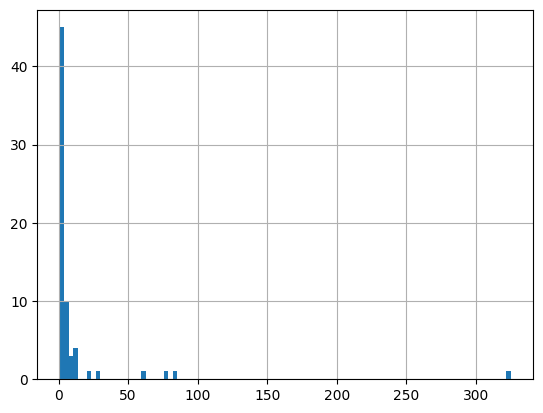

In [79]:
swissprot_CLEAN_withcluster_train[swissprot_CLEAN_withcluster_train['brenda'] == '4.2.1.20']['cluster50'].value_counts().hist(bins=100)

<Axes: >

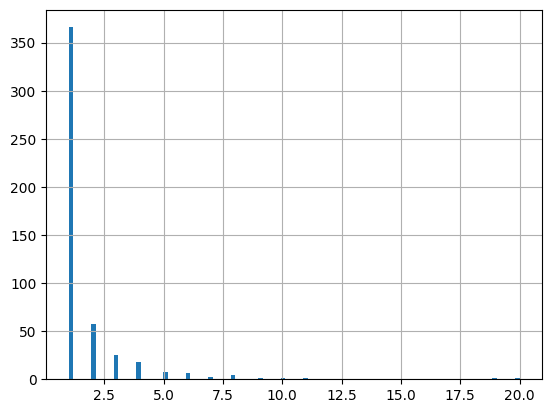

In [27]:
swissprot_CLEAN_withcluster[swissprot_CLEAN_withcluster['brenda'] == '4.2.1.20']['cluster90'].value_counts().hist(bins=100)

In [104]:
#save df as fasta
def save_fasta(df, filename):
    with open(filename, 'w') as f:
        for i, row in df.iterrows():
            f.write('>' + row['id'] + '\n')
            f.write(row['sequence'] + '\n')

save_fasta(swissprot_CLEAN, '/disk1/jyang4/repos/ProteinDT_submission/data/PECT/CLEANsplit100.fasta')

In [56]:
swissprot_CLEAN['sequence'].nunique()

134149

In [65]:
swissprot_CLEAN['brenda'].nunique()

3668

In [3]:
# swissprot = pd.read_csv('/disk1/jyang4/repos/ProteinDT_submission/data/SwissProtEnzymeCLAP/processed_data/swissprot_unique_240408.csv')
# swissprot

### More old stuff

In [21]:
testB = trembl[~trembl['sequence'].isin(swissprot_CLEAN['sequence'])]

np.random.seed(42)
random.seed(42)
#sample one enzyme per EC
#sample one reaction per enzyme
testB = testB.groupby('brenda', as_index=False).apply(lambda x: x.sample(1))
#map brenda to reaciton by sample randomly by using ec2rxns_train dictionary 
testB = testB[testB['brenda'].isin(ec2rxns_train.keys())]
testB['reaction_smiles'] = testB['brenda'].map(ec2rxns_train)
#random sample a value from reaction_smiles
np.random.seed(42)
random.seed(42)
testB['reaction_smiles'] = testB['reaction_smiles'].apply(lambda x: random.choice(x))
testB

Unnamed: 0          id  \
2    3128026      3978927  A0A0R2F886   
3    15021973     5929852  A0A7J8G6U3   
4    10049195     4004453  A0A1H1SFS6   
5    1122803      6481343  A0A661V5U6   
6    14076215     2544725  A0A7W2STK1   
...                   ...         ...   
1809 4315423      3336392  A0A420XI78   
1812 2193675      8023919  A0A972N6W5   
1813 5336085      2917973  A0A2N3KEU2   
1815 7924146      1431818  A0A7L4NXD3   
1816 666269       7281160  A0A812G2E9   

                                                            name  \
2    3128026                               Alcohol dehydrogenase   
3    15021973                               L-xylulose reductase   
4    10049195         3-oxoacyl-[acyl-carrier-protein] reductase   
5    1122803                      3-dehydrosphinganine reductase   
6    14076215                        L-threonine 3-dehydrogenase   
...                                                          ...   
1809 4315423   Ribose/galactose/methyl galactoside import ATP...   
1812 2193675   Spermidine/putrescine import ATP-binding prote...   
1813 5336085       Autoinducer 2 import ATP-binding protein LsrA   
1815 7924146          ATP-binding cassette sub-family B member 6   
1816 666269          Vitamin B12 import ATP-binding protein BtuD   

                                                        sequence  \
2    3128026   MKAAVVRENLDGFVDLIDDWEPRALGFGEALVDVEYSGLCHTDLHV...   
3    15021973  MELRLAGLRALVTGAGKGIGRSTVKALHAAGVQVVSVSRTQSDLDS...   
4    10049195  MSLQGKVALVTGATRGIGQAIALELGRQGAIVIGTATSAAGAERIA...   
5    1122803   MNFRDRHVIVTGGSSGIGRATARLLTRRGAHVSVVARRQELLDETL...   
6    14076215  MKSLAKLKSEPGIWMTDSPIPEVGHNDLLIKIKKTAICGTDIHIYN...   
...                                                          ...   
1809 4315423   MTEQTMQDGQVLLTMTDVSKSFPGVKALDHANLTVKSHSVHALMGE...   
1812 2193675   MTYAVELIDVVKEFPPGEKGKAKGVVAVDHVTLRIRDGEFFSLLGP...   
1813 5336085   MERKNQDAAAVRVNDIWKSYGGTAVLKGVDITLLPGQVHALLGGNG...   
1815 7924146   QVQFSLWLLRYICTFMLFILGMKAPGLPHKPYMLLVNEEERDVENS...   
1816 666269    MMHVKHIAVGSRLLPLSFECKPGEVVHVVGPNGSGKSTLLGAISGT...   

                                                           value     brenda  \
2    3128026   Weissella confusa|reaction:a primary alcohol +...    1.1.1.1   
3    15021973  Rousettus aegyptiacus|function:Catalyzes the N...   1.1.1.10   
4    10049195  Pseudomonas oryzae|function:Catalyzes the NADP...  1.1.1.100   
5    1122803   Chloroflexota bacterium|reaction:NADP(+) + sph...  1.1.1.102   
6    14076215  Colwellia sp. MB02u-10|function:Catalyzes the ...  1.1.1.103   
...                                                          ...        ...   
1809 4315423   Otariodibacter oris|function:Part of an ABC tr...   7.5.2.11   
1812 2193675   Chloroflexota bacterium|function:Part of the A...   7.6.2.11   
1813 5336085   Thalassospira marina|function:Part of the ABC ...   7.6.2.13   
1815 7924146   Ceyx cyanopectus|reaction:ATP + H2O + heme b(i...    7.6.2.5   
1816 666269    Vibrio sp. B1ASS3|function:Part of the ABC tra...    7.6.2.8   

              dataset                                    reaction_smiles  
2    3128026   trembl  CC(O)c1ccc(Cl)cc1.NC(=O)c1ccc[n+]([C@@H]2O[C@H...  
3    15021973  trembl  NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...  
4    10049195  trembl  CCCCCCCCCCCCCCCCCCCCCC(=O)CC(=O)SCCN=C([O-])CC...  
5    1122803   trembl  *CCCCCCCCCCCCCCCC(=O)[C@@H]([NH3+])CO.NC(=O)C1...  
6    14076215  trembl  NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...  
...               ...                                                ...  
1809 4315423   trembl  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
1812 2193675   trembl  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
1813 5336085   trembl  C[C@@]1(O)OC[C@H](O)C1(O)O.Nc1ncnc2c1ncn2[C@@H...  
1815 7924146   trembl  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe]35n6c(c(C)c(...  
1816 666269    trembl  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...  

[1591 rows x 8 columns]

In [26]:
testB.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/test_sets/testB_1591.csv', index=False)

In [32]:
testC = testA[testA['brenda'].isin(ec2rxns_test.keys())]
testC['reaction_smiles'] = testC['brenda'].map(ec2rxns_test)
# np.random.seed(42)
# random.seed(42)
# testD['reaction_smiles'] = testD['reaction_smiles'].apply(lambda x: random.choice(x)) #should choose the same thing every time
testC

/tmp/ipykernel_3388116/3647667207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testC['reaction_smiles'] = testC['brenda'].map(ec2rxns_test)


id     brenda  \
0    44133   P22245    1.1.1.1   
1    63883   G0RH19   1.1.1.10   
2    33067   Q89AG9  1.1.1.100   
3    40314   Q09851  1.1.1.101   
4    125422  Q6GV12  1.1.1.102   
...             ...        ...   
3657 84827   Q6BEX0    7.5.2.9   
3658 84791   Q89WG0   7.6.2.10   
3664 128098  Q9C8T1    7.6.2.5   
3666 20725   Q87Q38    7.6.2.8   
3667 49988   Q9RR46    7.6.2.9   

                                                      sequence  \
0    44133   MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
1    63883   MKNGAFPHDNAAVPNVERVLPLFSLKGRTAIVSGAGAGIGLAVAQA...   
2    33067   MKTTKKIAVITGANRGLGKGIAEELSNTNNITVIGTSTSQKGCKII...   
3    40314   MEAEKFVLITGCSEGGIGNALALKFHQEGFQVLATARQVERMDNLT...   
4    125422  MLLLAAAGLVAFVLLLYMVSPLISPKPLALPGAHVVVTGGSSGIGK...   
...                                                        ...   
3657 84827   MTTDQHQEILRTEGLSKFFPGVKALDNVDFSLRRGEIMALLGENGA...   
3658 84791   MANVTLRNVRKTYTGGFEAIKGVNVDVADGQFCVLVGPSGCGKSTL...   
3664 128098  MSIRRPQIPRLLLQNVSCMRNAQQILRHVNVSLHDGGALVLTGTNG...   
3666 20725   MMRVKHIAVGSRLLPLSFECKDGEVVHVVGPNGSGKSTLLAAISGT...   
3667 49988   MSKIKVEELTKIFGKKASKASSLLSQGKSKTDILKETGATIGVNKA...   

                                                          name  \
0    44133                               Alcohol dehydrogenase   
1    63883                                L-xylulose reductase   
2    33067     3-oxoacyl-[acyl-carrier-protein] reductase FabG   
3    40314   NADPH-dependent 1-acyldihydroxyacetone phospha...   
4    125422                 3-ketodihydrosphingosine reductase   
...                                                        ...   
3657 84827   Galactofuranose transporter ATP-binding protei...   
3658 84791   sn-glycerol-3-phosphate import ATP-binding pro...   
3664 128098                  ABC transporter I family member 1   
3666 20725         Vitamin B12 import ATP-binding protein BtuD   
3667 49988   Glycine betaine/carnitine transport ATP-bindin...   

                                               reaction_smiles  
0    44133   CCOC(=O)CC(=O)c1ccccc1.NC(=O)C1=CN([C@@H]2O[C@...  
1    63883   NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...  
2    33067   *N[C@@H](COP(=O)([O-])OCC(C)(C)[C@@H](O)C(=O)N...  
3    40314   *OC[C@@H](O)COP(=O)([O-])[O-].NC(=O)c1ccc[n+](...  
4    125422  CCCCCCCCCCCCCCC[C@@H](O)[C@@H](N)CO.NC(=O)C1=C...  
...                                                        ...  
3657 84827   Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
3658 84791   *OP(=O)([O-])OC[C@H](O)CO.Nc1ncnc2c1ncn2[C@@H]...  
3664 128098  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe-2]35n6c(c(C)...  
3666 20725   CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...  
3667 49988   C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...  

[2964 rows x 5 columns]

In [ ]:
testC.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/test_sets/testC_2964.csv', index=False)

In [31]:
testD = testB[testB['brenda'].isin(ec2rxns_test.keys())]
testD['reaction_smiles'] = testD['brenda'].map(ec2rxns_test)
# np.random.seed(42)
# random.seed(42)
# testD['reaction_smiles'] = testD['reaction_smiles'].apply(lambda x: random.choice(x)) #should choose the same thing every time
testD

/tmp/ipykernel_3388116/953053598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testD['reaction_smiles'] = testD['brenda'].map(ec2rxns_test)


Unnamed: 0          id  \
2    3128026      3978927  A0A0R2F886   
3    15021973     5929852  A0A7J8G6U3   
4    10049195     4004453  A0A1H1SFS6   
5    1122803      6481343  A0A661V5U6   
6    14076215     2544725  A0A7W2STK1   
...                   ...         ...   
1803 8368809      3468565  A0A081RZ04   
1807 5124319      2981165  A0A2T4N8B3   
1809 4315423      3336392  A0A420XI78   
1815 7924146      1431818  A0A7L4NXD3   
1816 666269       7281160  A0A812G2E9   

                                                            name  \
2    3128026                               Alcohol dehydrogenase   
3    15021973                               L-xylulose reductase   
4    10049195         3-oxoacyl-[acyl-carrier-protein] reductase   
5    1122803                      3-dehydrosphinganine reductase   
6    14076215                        L-threonine 3-dehydrogenase   
...                                                          ...   
1803 8368809         Arginine transport ATP-binding protein ArtP   
1807 5124319                      Type 3 secretion system ATPase   
1809 4315423   Ribose/galactose/methyl galactoside import ATP...   
1815 7924146          ATP-binding cassette sub-family B member 6   
1816 666269          Vitamin B12 import ATP-binding protein BtuD   

                                                        sequence  \
2    3128026   MKAAVVRENLDGFVDLIDDWEPRALGFGEALVDVEYSGLCHTDLHV...   
3    15021973  MELRLAGLRALVTGAGKGIGRSTVKALHAAGVQVVSVSRTQSDLDS...   
4    10049195  MSLQGKVALVTGATRGIGQAIALELGRQGAIVIGTATSAAGAERIA...   
5    1122803   MNFRDRHVIVTGGSSGIGRATARLLTRRGAHVSVVARRQELLDETL...   
6    14076215  MKSLAKLKSEPGIWMTDSPIPEVGHNDLLIKIKKTAICGTDIHIYN...   
...                                                          ...   
1803 8368809   MSIQLKSIDCYYGAHQALFDINLKCSSGETMVLLGPSGAGKSTLLR...   
1807 5124319   MTLSLDHIPDQLRHAIDECRLIQIRGRVTQVTGTLLKAVVPGVRIG...   
1809 4315423   MTEQTMQDGQVLLTMTDVSKSFPGVKALDHANLTVKSHSVHALMGE...   
1815 7924146   QVQFSLWLLRYICTFMLFILGMKAPGLPHKPYMLLVNEEERDVENS...   
1816 666269    MMHVKHIAVGSRLLPLSFECKPGEVVHVVGPNGSGKSTLLGAISGT...   

                                                           value     brenda  \
2    3128026   Weissella confusa|reaction:a primary alcohol +...    1.1.1.1   
3    15021973  Rousettus aegyptiacus|function:Catalyzes the N...   1.1.1.10   
4    10049195  Pseudomonas oryzae|function:Catalyzes the NADP...  1.1.1.100   
5    1122803   Chloroflexota bacterium|reaction:NADP(+) + sph...  1.1.1.102   
6    14076215  Colwellia sp. MB02u-10|function:Catalyzes the ...  1.1.1.103   
...                                                          ...        ...   
1803 8368809   Photorhabdus temperata subsp. temperata Meg1|r...    7.4.2.1   
1807 5124319   Aeromonas veronii|reaction:ATP + H2O + cellula...    7.4.2.8   
1809 4315423   Otariodibacter oris|function:Part of an ABC tr...   7.5.2.11   
1815 7924146   Ceyx cyanopectus|reaction:ATP + H2O + heme b(i...    7.6.2.5   
1816 666269    Vibrio sp. B1ASS3|function:Part of the ABC tra...    7.6.2.8   

              dataset                                    reaction_smiles  
2    3128026   trembl  CCOC(=O)CC(=O)c1ccccc1.NC(=O)C1=CN([C@@H]2O[C@...  
3    15021973  trembl  NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...  
4    10049195  trembl  *N[C@@H](COP(=O)([O-])OCC(C)(C)[C@@H](O)C(=O)N...  
5    1122803   trembl  CCCCCCCCCCCCCCC[C@@H](O)[C@@H](N)CO.NC(=O)C1=C...  
6    14076215  trembl  CC(=O)C(C)O.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(...  
...               ...                                                ...  
1803 8368809   trembl  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
1807 5124319   trembl  *N[C@@H](*)C(=O)N[C@@H](*)C(=O)O*.Nc1ncnc2c1nc...  
1809 4315423   trembl  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
1815 7924146   trembl  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe-2]35n6c(c(C)...  
1816 666269    trembl  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...  

[1400 rows x 8 columns]

In [27]:
testD.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/test_sets/testD_1400.csv', index=False)

### reaction set which has each reaction associated to a random protein

In [12]:
all_reactions = pd.read_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_sets/testA_3668.csv')
all_reactions_train = all_reactions.copy()
all_reactions_train['reaction_smiles'] = all_reactions_train['brenda'].map(ec2rxns_train)
#explode the list of reaction_smiles
all_reactions_train = all_reactions_train.explode('reaction_smiles')
all_reactions_train['split'] = 'train'

all_reactions_test = all_reactions.copy()
all_reactions_test['reaction_smiles'] = all_reactions_test['brenda'].map(ec2rxns_test)
#explode the list of reaction_smiles
all_reactions_test = all_reactions_test.explode('reaction_smiles')
all_reactions_test['split'] = 'test'

all_reactions = pd.concat([all_reactions_train, all_reactions_test])
all_reactions.dropna(subset=['reaction_smiles'], inplace=True)
all_reactions

id    brenda                                           sequence  \
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
...      ...       ...                                                ...   
3657  Q6BEX0   7.5.2.9  MTTDQHQEILRTEGLSKFFPGVKALDNVDFSLRRGEIMALLGENGA...   
3658  Q89WG0  7.6.2.10  MANVTLRNVRKTYTGGFEAIKGVNVDVADGQFCVLVGPSGCGKSTL...   
3664  Q9C8T1   7.6.2.5  MSIRRPQIPRLLLQNVSCMRNAQQILRHVNVSLHDGGALVLTGTNG...   
3666  Q87Q38   7.6.2.8  MMRVKHIAVGSRLLPLSFECKDGEVVHVVGPNGSGKSTLLAAISGT...   
3667  Q9RR46   7.6.2.9  MSKIKVEELTKIFGKKASKASSLLSQGKSKTDILKETGATIGVNKA...   

                                                   name  \
0                                 Alcohol dehydrogenase   
0                                 Alcohol dehydrogenase   
0                                 Alcohol dehydrogenase   
0                                 Alcohol dehydrogenase   
0                                 Alcohol dehydrogenase   
...                                                 ...   
3657  Galactofuranose transporter ATP-binding protei...   
3658  sn-glycerol-3-phosphate import ATP-binding pro...   
3664                  ABC transporter I family member 1   
3666        Vitamin B12 import ATP-binding protein BtuD   
3667  Glycine betaine/carnitine transport ATP-bindin...   

                                        reaction_smiles  split  
0     CCCCC[C@@H](C)O.NC(=O)c1ccc[n+]([C@@H]2O[C@H](...  train  
0     CCCCCCC(C)=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)...  train  
0     CC(=O)CC(C)=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O...  train  
0     CC(=O)C(C)=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)...  train  
0     CC(O)c1ccccc1.NC(=O)c1ccc[n+]([C@@H]2O[C@H](CO...  train  
...                                                 ...    ...  
3657  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...   test  
3658  *OP(=O)([O-])OC[C@H](O)CO.Nc1ncnc2c1ncn2[C@@H]...   test  
3664  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe-2]35n6c(c(C)...   test  
3666  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...   test  
3667  C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...   test  

[46983 rows x 6 columns]

In [ ]:
all_reactions.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_sets/all_reactions_46983.csv', index=False)

### All proteins set with has each protein associated to a random reaction

In [ ]:
df = pd.read_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_sets/all_proteins_CLEAN100.csv')
#add reaction_smiles as a filler
df['reaction_smiles'] = 'C'
df.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_sets/all_proteins_CLEAN100.csv', index=False)

### If you want to build the test set from our swissport and the CLEAN swissprot (not sure if makes sense)

Include EC numbers with dashes for now